In [1]:
# Run preprocessing script to make dataframe objects available.

%run PreProcessing.ipynb

Current Progress: 100.0 %


In [2]:
# Import required libraries.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import *
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from dtreeviz.trees import dtreeviz
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
# Assign 'X' and 'y' values and split into seperate train and test df.
# If there is little benefit from specific indicators they can be removed.

X = summary_data_avg[['pp2m2', 'heat_units', 'solar_radiation', 'organic_matter', 'sand', 'silt', 'clay', 'method', 'variety', 'inputs', 'protection']]
y = summary_data_avg['mean_diameter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
X_train

pp2m2  heat_units  solar_radiation  organic_matter  sand  silt  clay  \
1633     30        1198          1148434            33.9    13    61    26   
618      41        2454          1685924            46.0    78    21     1   
2189     37        1122          1123684             1.8    34    55    11   
69       35        2372          1641022            17.0    39    43    18   
918      35         679           722210            32.7    36    42    22   
29       37        2360          1652591            24.6    40    41    19   
1695     32         397           537817            47.8     5    68    27   
989      33        1664          1083486            36.2    11    67    22   
3233     43        1068           889935             2.8    50    36    14   
1679     32         974          1225682            43.7    13    55    32   
981      40        1858          1164880            36.2    11    67    22   
3238     47        1068           889935             2.8    50    36    14   
1114     53        1857          1318692            18.5    38    41    21   
2161     39        1126          1128044             1.7    28    60    12   
1184     45        1417          1201600            21.3    41    35    24   
3197     25        2421          1819916             2.8    38    45    17   
259      41        1037           875731            10.2    76     8    16   
1460     33         935          1165446            24.2    42    34    24   
2796     50        1276          1480383            75.7    19    62    19   
347      36        2357          1446152            11.3    43    33    24   
1637     33         735           833209            33.9    13    61    26   
1120     67        1822          1232880            18.5    38    41    21   
1396     44         808           805626            63.9     6    76    18   
2436     48         820           896150            31.0    30    58    12   
2158     43        2332          1727764             1.8    30    60    10   
2438     38        1309          1230989            31.0    30    58    12   
3272     36        2615          1701144             2.6    56    31    13   
1513     34         725           857205            25.8    32    51    17   
1783     32         921           814182            59.6     1    73    26   
229      35        2244          1898695            19.3    42    33    25   
2551     41        1236           604529             2.5    33    50    17   
867      43         848           914146            53.9     8    72    20   
2148     37        1044           862385             3.1    22    57    21   
2172     41        2332          1727764             1.8    31    57    12   
547      44        1585          1430414            70.3    18    59    23   
1962     32        2459          1899891             1.9    67    26     7   
228      44        1882          1739756            19.3    42    33    25   
37       46        1640          1218712            29.6    39    37    24   
3373     48         822           923786            64.5     9    74    17   
1397     35         993           938404            63.9     6    76    18   
2470     48        1255          1372782            56.7    17    56    27   
675      24         925           618802             2.5    86     8     6   
596      37        1290           734641             2.4    88     6     6   
825      46        1223          1376805            74.7    19    67    14   
235      43        2420          1952377            19.3    42    33    25   
727      42         165           103796             2.4    40    50    10   
3281     30        1092           909996             2.6    56    31    13   
3301     46         809           914106            69.8    38    52    10   
3143     21        1540          1396594             2.6    42    42    16   
1448     34         838           985928            18.6    45    32    23   
3172     24        1743     

In [4]:
X_test

pp2m2  heat_units  solar_radiation  organic_matter  sand  silt  clay  \
2724     52        2598          1671671             3.4    49    37    14   
2131     39        1358          1026125             8.2    39    36    25   
2640     43        1391           780391             3.1    38    48    14   
2739     43        1788          1466930            77.3     3    76    21   
1255     19        1799          1089539            42.1    19    53    28   
485      48        1012          1334257            16.8    68    15    17   
202      39        2366          1453992            19.9    31    36    33   
298      22        2218          1449307            13.7    73    15    12   
923      33        1784          1293380            29.2    32    28    40   
2043     39        2338          1518720             2.4    59    31    10   
688      35        1563           851190             1.2    40    49    11   
1232     37        2261          1551091            42.1    19    53    28   
2859     40         334           507364             3.0    72    15    13   
333      35        1450          1046602             8.4    50    31    19   
1446     35        1059          1219620            18.6    45    32    23   
944      38        1784          1293380            29.2    32    28    40   
1332     63        1404          1288220            19.0    47    31    22   
643      42        1106          1059477            30.0    50    32    18   
311      33        1572          1184090            14.8    69    19    12   
879      49         848           914146            53.9     8    72    20   
192      48        2366          1453992            19.9    31    36    33   
634      39        1947          1542627            44.0    78    21     1   
1837     34        1137          1121947            27.9    28    37    35   
3309     47        1693          1467699            59.1    33    54    13   
3425     50        1006          1267540            69.5     9    65    26   
654      35         707           538908             2.5    86     8     6   
2889     29        2281          1599232            26.7    22    55    23   
1798     30         444           462769            59.6     1    73    26   
1203     42        2407          1699838            21.3    41    35    24   
3307     47        1105          1140019            59.1    33    54    13   
678      20        1716           981499             2.5    86     8     6   
686      37         882           549903             1.2    40    49    11   
971      36        2023          1256472            36.2    11    67    22   
3093     43        1130           594521             2.4    72    23     5   
33       34        1966          1497247            24.6    40    41    19   
2872     35         944           983865             3.0    72    15    13   
1362     34        1672          1133701            12.0    45    33    22   
224      54        2253          1911219            19.3    42    33    25   
2490     40        1579          1513714            30.1    61    25    14   
517      47         991          1252162            76.9    25    58    17   
1898     30         583           496026            31.9    14    65    21   
1535     33         569           939369            63.4     6    61    33   
2901     40        1388          1208970            26.7    22    55    23   
436      41        1685          1451498            78.7    19    68    13   
1052     82         839           949709            18.5    38    41    21   
2126     37        1628          1151293             8.2    39    36    25   
1094     67        1273          1172205            18.5    38    41    21   
295      25        1327          1059853            13.7    73    15    12   
1300     80         935          1270494            13.0    47    31    22   
2608     33        2218          1581201             2.9    38    49    13   
3351     43         826     

In [5]:
# Encode categoriccal variables that will be used as predictors

enc = OrdinalEncoder()
encoded_array = enc.fit_transform(X_train[['method', 'variety', 'inputs', 'protection']])
X_train.loc[:, ['method', 'variety', 'inputs', 'protection']] = encoded_array.copy()

encoded_array = enc.transform(X_test[['method', 'variety', 'inputs', 'protection']])
X_test.loc[:, ['method', 'variety', 'inputs', 'protection']] = encoded_array.copy()


c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [6]:
X_train

pp2m2  heat_units  solar_radiation  organic_matter  sand  silt  clay  \
1633     30        1198          1148434            33.9    13    61    26   
618      41        2454          1685924            46.0    78    21     1   
2189     37        1122          1123684             1.8    34    55    11   
69       35        2372          1641022            17.0    39    43    18   
918      35         679           722210            32.7    36    42    22   
29       37        2360          1652591            24.6    40    41    19   
1695     32         397           537817            47.8     5    68    27   
989      33        1664          1083486            36.2    11    67    22   
3233     43        1068           889935             2.8    50    36    14   
1679     32         974          1225682            43.7    13    55    32   
981      40        1858          1164880            36.2    11    67    22   
3238     47        1068           889935             2.8    50    36    14   
1114     53        1857          1318692            18.5    38    41    21   
2161     39        1126          1128044             1.7    28    60    12   
1184     45        1417          1201600            21.3    41    35    24   
3197     25        2421          1819916             2.8    38    45    17   
259      41        1037           875731            10.2    76     8    16   
1460     33         935          1165446            24.2    42    34    24   
2796     50        1276          1480383            75.7    19    62    19   
347      36        2357          1446152            11.3    43    33    24   
1637     33         735           833209            33.9    13    61    26   
1120     67        1822          1232880            18.5    38    41    21   
1396     44         808           805626            63.9     6    76    18   
2436     48         820           896150            31.0    30    58    12   
2158     43        2332          1727764             1.8    30    60    10   
2438     38        1309          1230989            31.0    30    58    12   
3272     36        2615          1701144             2.6    56    31    13   
1513     34         725           857205            25.8    32    51    17   
1783     32         921           814182            59.6     1    73    26   
229      35        2244          1898695            19.3    42    33    25   
2551     41        1236           604529             2.5    33    50    17   
867      43         848           914146            53.9     8    72    20   
2148     37        1044           862385             3.1    22    57    21   
2172     41        2332          1727764             1.8    31    57    12   
547      44        1585          1430414            70.3    18    59    23   
1962     32        2459          1899891             1.9    67    26     7   
228      44        1882          1739756            19.3    42    33    25   
37       46        1640          1218712            29.6    39    37    24   
3373     48         822           923786            64.5     9    74    17   
1397     35         993           938404            63.9     6    76    18   
2470     48        1255          1372782            56.7    17    56    27   
675      24         925           618802             2.5    86     8     6   
596      37        1290           734641             2.4    88     6     6   
825      46        1223          1376805            74.7    19    67    14   
235      43        2420          1952377            19.3    42    33    25   
727      42         165           103796             2.4    40    50    10   
3281     30        1092           909996             2.6    56    31    13   
3301     46         809           914106            69.8    38    52    10   
3143     21        1540          1396594             2.6    42    42    16   
1448     34         838           985928            18.6    45    32    23   
3172     24        1743     

In [7]:
X_test

pp2m2  heat_units  solar_radiation  organic_matter  sand  silt  clay  \
2724     52        2598          1671671             3.4    49    37    14   
2131     39        1358          1026125             8.2    39    36    25   
2640     43        1391           780391             3.1    38    48    14   
2739     43        1788          1466930            77.3     3    76    21   
1255     19        1799          1089539            42.1    19    53    28   
485      48        1012          1334257            16.8    68    15    17   
202      39        2366          1453992            19.9    31    36    33   
298      22        2218          1449307            13.7    73    15    12   
923      33        1784          1293380            29.2    32    28    40   
2043     39        2338          1518720             2.4    59    31    10   
688      35        1563           851190             1.2    40    49    11   
1232     37        2261          1551091            42.1    19    53    28   
2859     40         334           507364             3.0    72    15    13   
333      35        1450          1046602             8.4    50    31    19   
1446     35        1059          1219620            18.6    45    32    23   
944      38        1784          1293380            29.2    32    28    40   
1332     63        1404          1288220            19.0    47    31    22   
643      42        1106          1059477            30.0    50    32    18   
311      33        1572          1184090            14.8    69    19    12   
879      49         848           914146            53.9     8    72    20   
192      48        2366          1453992            19.9    31    36    33   
634      39        1947          1542627            44.0    78    21     1   
1837     34        1137          1121947            27.9    28    37    35   
3309     47        1693          1467699            59.1    33    54    13   
3425     50        1006          1267540            69.5     9    65    26   
654      35         707           538908             2.5    86     8     6   
2889     29        2281          1599232            26.7    22    55    23   
1798     30         444           462769            59.6     1    73    26   
1203     42        2407          1699838            21.3    41    35    24   
3307     47        1105          1140019            59.1    33    54    13   
678      20        1716           981499             2.5    86     8     6   
686      37         882           549903             1.2    40    49    11   
971      36        2023          1256472            36.2    11    67    22   
3093     43        1130           594521             2.4    72    23     5   
33       34        1966          1497247            24.6    40    41    19   
2872     35         944           983865             3.0    72    15    13   
1362     34        1672          1133701            12.0    45    33    22   
224      54        2253          1911219            19.3    42    33    25   
2490     40        1579          1513714            30.1    61    25    14   
517      47         991          1252162            76.9    25    58    17   
1898     30         583           496026            31.9    14    65    21   
1535     33         569           939369            63.4     6    61    33   
2901     40        1388          1208970            26.7    22    55    23   
436      41        1685          1451498            78.7    19    68    13   
1052     82         839           949709            18.5    38    41    21   
2126     37        1628          1151293             8.2    39    36    25   
1094     67        1273          1172205            18.5    38    41    21   
295      25        1327          1059853            13.7    73    15    12   
1300     80         935          1270494            13.0    47    31    22   
2608     33        2218          1581201             2.9    38    49    13   
3351     43         826     

In [8]:
print(max(X_train['method']))
print(max(X_train['inputs']))
print(max(X_train['variety']))
print(max(X_train['protection']))

5.0
2.0
26.0
3.0


In [9]:
# Use the isolation forest algorithm to remove the most rogue 5% of datapoints.
# Check only 10% was removed.

print(f"The old training dataframe shape: {X_train.shape}")

clf1 = IsolationForest(max_samples=500, random_state = 10, contamination = 0.05)
preds = clf1.fit_predict(X_train)

totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

The old training dataframe shape: (2756, 11)
Total number of outliers identified is:  138


In [10]:
# Remove outliers from training data.
# Do not remove from test data as this is bad practice.
# Confirm removal by checking new df shape.

filtered_array = []
for element in preds:
  if element != -1:
    filtered_array.append(True)
  else:
    filtered_array.append(False)
X_train = X_train[filtered_array]
y_train = y_train[filtered_array]

print(f"The new training dataframe shape: {X_train.shape}")

The new training dataframe shape: (2618, 11)


In [11]:
X_train['protection'].value_counts()

0.0    1304
2.0    1166
1.0     130
3.0      18
Name: protection, dtype: int64

In [12]:
# Scaled data although there is no need to scale with a Random Forest algorithm.
# Only fit the scaled data using the training df but use it to transform both test and train.
# This data won't be used but this is necessary for a lot of other ML algorithms.
# Keep here as a reminder in case another model is developed.

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [13]:
# Hypertuning model to find best parameters.
# Print the best qualitative parameters to use within the model.

param_grid = {'random_state': [10],
              'max_features': ['sqrt', 'auto', 'log2'],
              'bootstrap': [True, False]}  
   
grid_rfr = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose = 3, n_jobs= 2)

grid_rfr.fit(X_train, y_train.values.ravel()) 
 
print(grid_rfr.best_params_)   

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'bootstrap': True, 'max_features': 'auto', 'random_state': 10}


In [14]:
# Fit semi-hypertuned model and print score.

rfr = RandomForestRegressor(bootstrap = True,
                            max_features = 'auto',
                            random_state = 10)
rfr_model = rfr.fit(X_train, y_train.values.ravel())
rfr_model_pred = rfr_model.predict(X_test)
print(rfr.score(X_test, y_test))

0.9264405128391974


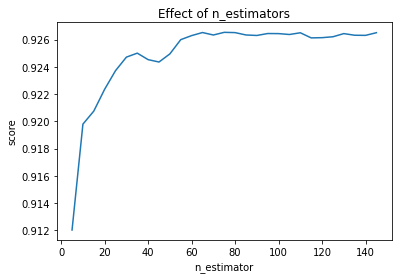

In [15]:
# Further hypertuning for quantitative parameters.
# Optimisation for n_estimators parameter.

estimators = np.arange(5, 150, 5)
scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [16]:
# Set parameter to optimum and retest score.

rfr.set_params(n_estimators = 40)
rfr_model = rfr.fit(X_train, y_train.values.ravel())
rfr_model_pred = rfr_model.predict(X_test)
print(rfr.score(X_test, y_test))

0.9245295999390866


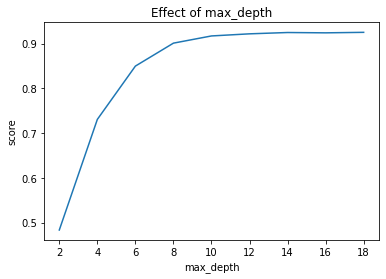

In [17]:
# Optimisation for max_depth parameter.

depth = np.arange(2, 20, 2)
scores = []
for n in depth:
    rfr.set_params(max_depth=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(depth, scores)

In [18]:
# Set parameter to optimum and retest score.

rfr.set_params(max_depth = 14)
rfr_model = rfr.fit(X_train, y_train.values.ravel())
rfr_model_pred = rfr_model.predict(X_test)
print(rfr.score(X_test, y_test))

0.924850582132961


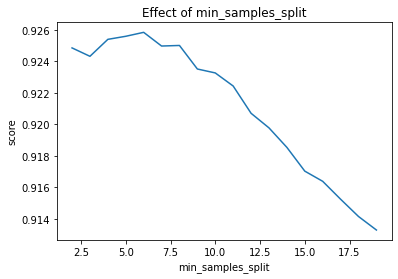

In [19]:
# Optimisation for min_samples_split parameter.

min_samples_split = np.arange(2, 20, 1)
scores = []
for n in min_samples_split:
    rfr.set_params(min_samples_split=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("score")
plt.plot(min_samples_split, scores)

In [20]:
# Set parameter to optimum and retest score.

rfr.set_params(min_samples_split = 10)
rfr_model = rfr.fit(X_train, y_train.values.ravel())
rfr_model_pred = rfr_model.predict(X_test)
print(rfr.score(X_test, y_test))

0.9232625569635236


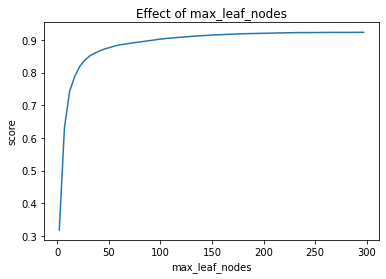

In [21]:
# Optimisation for max_leaf_nodes parameter.

max_leaf_nodes = np.arange(2, 302, 5)
scores = []
for n in max_leaf_nodes:
    rfr.set_params(max_leaf_nodes=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of max_leaf_nodes")
plt.xlabel("max_leaf_nodes")
plt.ylabel("score")
plt.plot(max_leaf_nodes, scores)

In [22]:
# Set parameter to optimum and retest score.

rfr.set_params(max_leaf_nodes = 150)
rfr_model = rfr.fit(X_train, y_train.values.ravel())
rfr_model_pred = rfr_model.predict(X_test)
print(rfr.score(X_test, y_test))

0.9144914303956803


In [23]:
# Join 'X' and 'y' test df together along with predictions to make visualisations easier.
# Please note... only the test data.

y_test_df = y_test.to_frame()
y_test_df = y_test_df.rename(columns = {0:'mean_diameter'}).reset_index(drop=True)

pred_df = pd.DataFrame(rfr_model_pred, columns = ['predicted_mean_diameter']).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test, columns = ['pp2m2', 'heat_units', 'solar_radiation', 'organic_matter', 'sand', 'silt', 'clay', 'method', 'variety', 'inputs', 'protection']).reset_index(drop = True)

test_df = X_test_df.copy()
test_df['predicted_mean_diameter'] = pd.Series(pred_df['predicted_mean_diameter'])
test_df['mean_diameter'] = pd.Series(y_test_df['mean_diameter'])

test_df[['method', 'variety', 'inputs', 'protection']] = enc.inverse_transform(test_df[['method',
                                                                                        'variety',
                                                                                        'inputs',
                                                                                        'protection']])

test_df.head()

pp2m2  heat_units  solar_radiation  organic_matter  sand  silt  clay  \
0     52        2598          1671671             3.4    49    37    14   
1     39        1358          1026125             8.2    39    36    25   
2     43        1391           780391             3.1    38    48    14   
3     43        1788          1466930            77.3     3    76    21   
4     19        1799          1089539            42.1    19    53    28   

       method   variety        inputs protection  predicted_mean_diameter  \
0     Drilled  Chiefton  Conventional       None                28.344652   
1     Modules  Chiefton       Organic       None                20.022191   
2  Bare Roots   Harston  Conventional       None                25.113149   
3     Drilled   Shafton  Conventional     Barley                27.262124   
4     Drilled    Batter          Baby       None                14.447746   

   mean_diameter  
0      26.096154  
1      20.499487  
2      22.400930  
3      25.973953  
4      12.541053

In [24]:
test_df.shape

(689, 13)

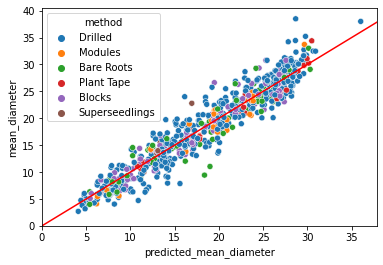

In [25]:
# Scatterplot to show how predicted mean compares to actual mean.
# Set hue to see if any indicator variables have a bias.

sns.scatterplot(y = 'mean_diameter', x = 'predicted_mean_diameter', hue = 'method', data = test_df)
plt.axline([0, 0], [1, 1], color = 'r')
plt.ylim(0)
plt.xlim(0)
plt.show()

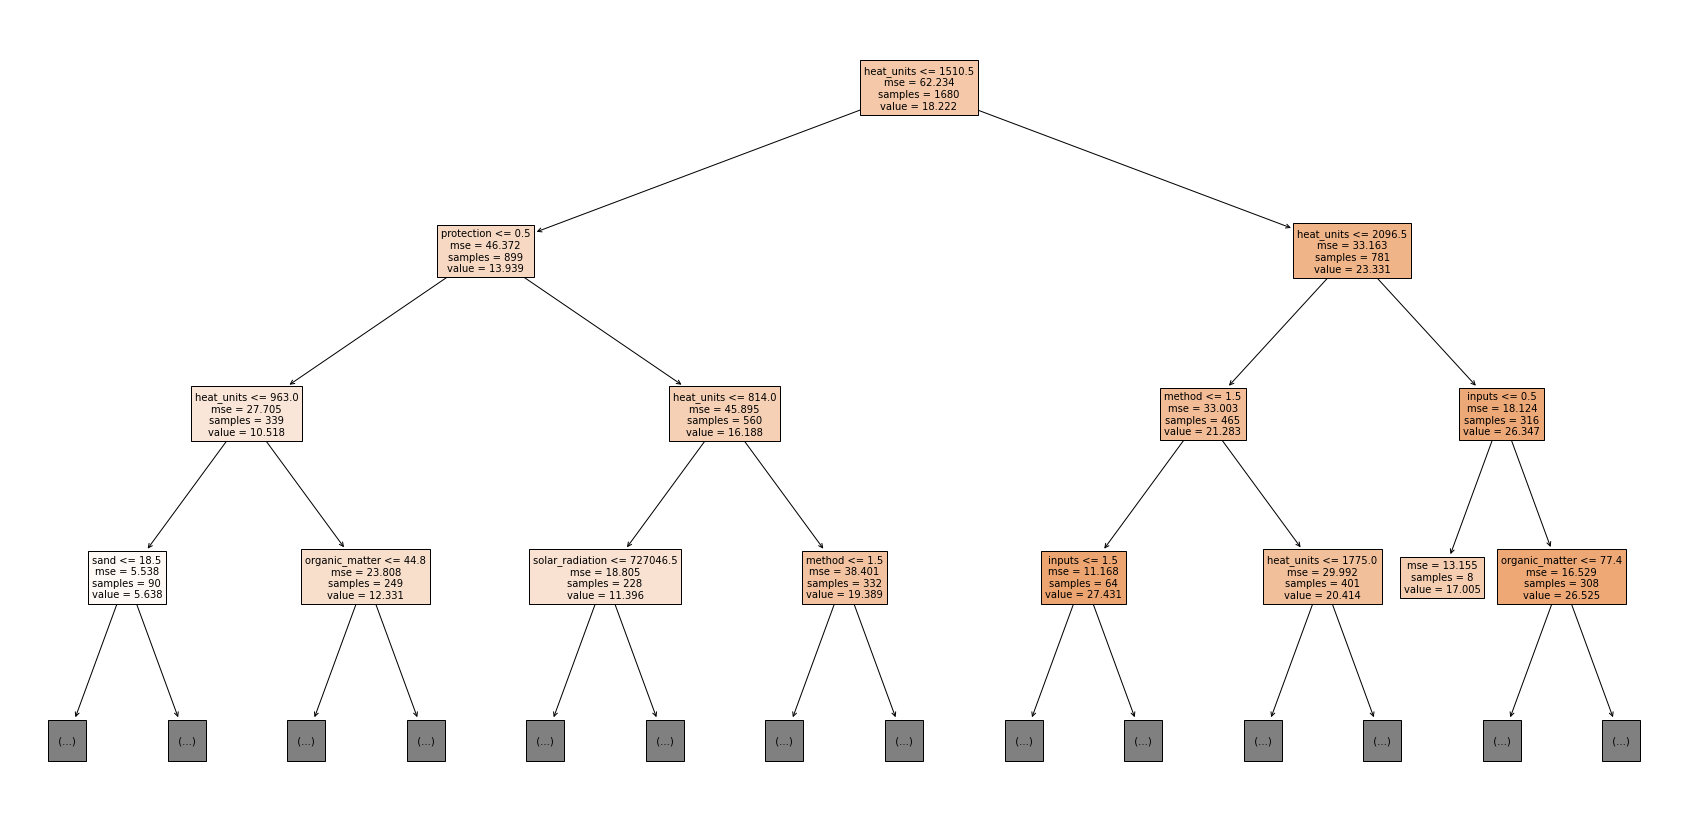

In [31]:
# Tree visualisation to depth of 3.
# Struggling to make visualisation go any deeper.

plt.figure(figsize=(30,15))
tree.plot_tree(rfr.estimators_[0], feature_names=X_train.columns, filled=True, max_depth = 3, fontsize=10)
plt.savefig('Decision Tree.png', dpi=300, bbox_inches = 'tight')
plt.show()

Text(0.5, 0, 'Feature Importance')

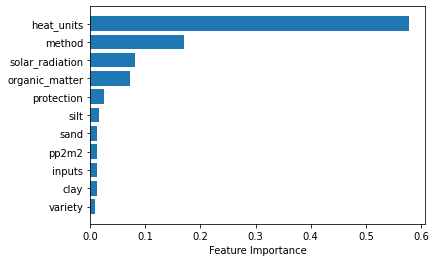

In [27]:
sort = rfr.feature_importances_.argsort()
plt.barh(np.array(X_test.columns)[sort], rfr.feature_importances_[sort])
plt.xlabel("Feature Importance")